In [5]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [8]:
import os
print(os.getcwd())
os.chdir("BBQDemo/check/")

/Users/mingrenshen/PycharmProjects/BBQ


In [9]:
predArr = np.loadtxt("pred_a.txt",delimiter=',')

In [15]:
print(gtNumDefects[0][3])

IndexError: index 3 is out of bounds for axis 0 with size 3

In [10]:
bbox_label_names = ('111', 'dot','100')
gtNumDefects = np.zeros(shape=(1, len(bbox_label_names)))
# get ground truth class numbers
for k in range(0, len(predArr)):
    gtNumDefects[0, int(predArr[k][0])] += 1

In [18]:
imgArr = io.imread(imgPath)

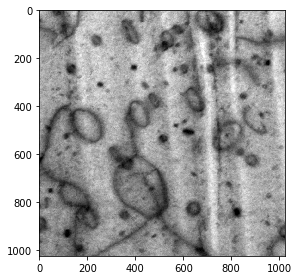

In [19]:
io.imshow(imgArr)

In [34]:
def bbox_iou(a, b):
    """Calculate the Intersection of Unions (IoUs) between bounding boxes.
    IoU is calculated as a ratio of area of the intersection
    and area of the union.

    Args:
        a: (list of 4 numbers) [x1,y1,x2,y2]
        b: (list of 4 numbers) [x1,y1,x2,y2]
    Returns:
        iou: the value of the IoU of two bboxes

    """
    # (float) Small value to prevent division by zero
    epsilon = 1e-5
    # COORDINATES OF THE INTERSECTION BOX
    x1 = max(a[0], b[0])
    y1 = max(a[1], b[1])
    x2 = min(a[2], b[2])
    y2 = min(a[3], b[3])

    # AREA OF OVERLAP - Area where the boxes intersect
    width = (x2 - x1)
    height = (y2 - y1)
    # handle case where there is NO overlap
    if (width < 0) or (height < 0):
        return 0.0
    area_overlap = width * height

    # COMBINED AREA
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    # RATIO OF AREA OF OVERLAP OVER COMBINED AREA
    iou = area_overlap / (area_combined+epsilon)
    return iou

In [35]:
gtArr = predArr = np.loadtxt(gtPath,delimiter=',')

In [38]:
# for each predicted bbox
for i in range(0, len(predArr)):
    tmpIoU_list = []
    for j in range(0, len(gtArr)):
        tmpIoU_list.append(bbox_iou(predArr[i][1:], gtArr[j][1:]))

In [40]:
def bbox_area(bbox):
    """Calculate the area of a bounding boxes.
    Args:
        bbox: (array of 4 numbers) [x1,y1,x2,y2]
    Returns:
        area: the area of a bbox
    """
    area = (bbox[3] - bbox[1])*(bbox[2] - bbox[0])
    return area

In [41]:
bbox_area(predArr[5][1:])

6256.000000000001

In [2]:
    for k in range(0, len(gtArr)):
        gtNumDefects[0, int(gtArr[k][0])] += 1

NameError: name 'gtArr' is not defined